<a href="https://colab.research.google.com/github/rjz46/Cornell-Conversational-Analysis-Toolkit/blob/master/datasets/reddit_coarse_discourse-corpus/A1E_Upvote_Toxicity_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [1]:
from IPython.display import display as disp
from zipfile import ZipFile
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections

from collections import defaultdict

print("""\n***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. \n\n""")
%load_ext autoreload


***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. 




In [2]:
#@title Change working dir if necessary before importing convokit

# UNCOMMENT AND RUN ONCE PER KERNEL, listdir() output should include "convokit"
# os.chdir('../..')

print(os.listdir())

['LICENSE.md', 'convokit', 'requirements.txt', 'Makefile', 'website', 'datasets', 'tests', 'venv_c', 'README.md', 'setup.py', '.gitignore', 'CONTRIBUTING.md', 'examples', 'doc', '.git']


In [0]:
import convokit
from convokit import Toxicity

In [5]:
# Reload convokit (and any other module) after making local changes.
print("""\n***If you see a StopIteration error, run this cell again.\n\n""")
%autoreload


***If you see a StopIteration error, run this cell again.




# Load dataset and transform

In [0]:
reddit_corpus = convokit.Corpus(filename="datasets/reddit_coarse_discourse-corpus/corpus")

In [7]:
tox = Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_coarse_discourse.json")
tox.transform(reddit_corpus)

# Sequences

In [8]:
subreddit_counter = collections.Counter()
convos = reddit_corpus.conversations


for convoutt in convos: 
    #print(convos[convoutt])
    subrd = convos[convoutt].meta["subreddit"]
    subreddit_counter.update({subrd:1})
top_25_subreddits = dict(subreddit_counter.most_common(25))

print(top_25_subreddits.keys())

dict_keys(['askreddit', 'leagueoflegends', 'buildapc', 'explainlikeimfive', 'trees', 'pcmasterrace', 'gaming', 'techsupport', 'electronic_cigarette', 'relationships', 'tipofmytongue', 'hearthstone', 'atheism', 'jailbreak', 'summonerschool', 'personalfinance', 'reddit.com', 'whowouldwin', 'destinythegame', 'movies', 'pokemon', 'starcraft', 'malefashionadvice', 'askscience', 'loseit'])


In [0]:
top_level_posts = {}
counter = 0
in_top_25 = {}

for x in convos:
    if convos[x].meta["subreddit"] in top_25_subreddits.keys():
        in_top_25[x] = convos[x]

In [10]:
utts = reddit_corpus.utterances

print(len(in_top_25))

2021


# Upvotes

In [11]:
utt_ups_tox = {}
upsvalues = []
toxvalues = []

for x in convos:
    if not utts[x].meta['ups'] == None:
        utt_ups_tox[x] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        upsvalues.append(utts[x].meta['ups'])
        toxvalues.append(utts[x].meta['toxicity'])
    else:
        utt_ups_tox[x] = [0, utts[x].meta['toxicity']]
        upsvalues.append(0)
        toxvalues.append(utts[x].meta['toxicity'])

print(list(convos.items())[10])

('t3_289m0u', Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x7fda7060f0b8>, '_id': 't3_289m0u', '_utterance_ids': ['t3_289m0u', 't1_ci8sl95', 't1_ci8ui3k', 't1_ci8ub9d'], '_usernames': None, '_meta': {'subreddit': '2007scape', 'url': 'https://www.reddit.com/r/2007scape/comments/289m0u/i_played_2007scape_when_it_was_first_released/', 'title': "I played 2007scape when it was first released, what's changed since then?", 'averagetoxicity': 0.04370849525}}))


Text(0.5, 0, 'Toxicity Score')

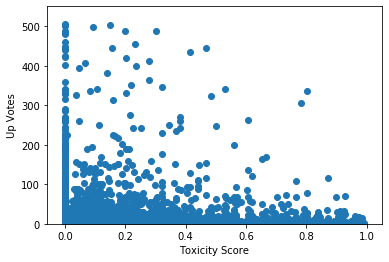

In [12]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


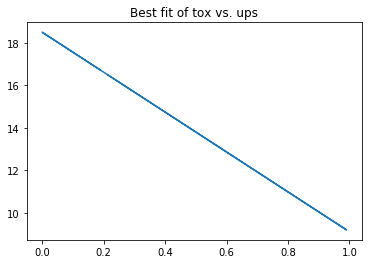

In [13]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [14]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686597


In [15]:
upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

('starcraft', -0.27384032357600807)
('atheism', -0.22348513909807635)
('explainlikeimfive', -0.13939416840791383)
('askscience', -0.10956977150863109)
('trees', -0.09727628835606086)
('hearthstone', -0.0970309933426117)
('tipofmytongue', -0.09066037183271945)
('buildapc', -0.07521749787184404)
('leagueoflegends', -0.06775391921410352)
('jailbreak', -0.06285257687786554)
('gaming', -0.041727481525480344)
('askreddit', -0.02767994907134295)
('electronic_cigarette', -0.02331297129980621)
('whowouldwin', 0.00402234714291879)
('pcmasterrace', 0.00446416832200411)
('personalfinance', 0.007126925299185703)
('malefashionadvice', 0.04441819503811307)
('loseit', 0.06596538002773104)
('summonerschool', 0.10341093480314038)
('pokemon', 0.11008570857269556)
('relationships', 0.1204720997965011)
('destinythegame', 0.12438564649784901)
('reddit.com', 0.13082806745092074)
('movies', 0.13592512094621084)
('techsupport', 0.14165529303857546)


# E3: Run on another dataset

## Test on reddit-small

In [0]:
# Load "reddit-corpus-small"
small_reddit_corpus_raw = convokit.Corpus(convokit.download("reddit-corpus-small"))

Dataset already exists at /Users/katyblumer/.convokit/downloads/reddit-corpus-small


In [0]:
#@title Subsample dataset
num_convos = 2 #@param

sampled_utts = []
convo_sample_ids = small_reddit_corpus_raw.get_conversation_ids()[:num_convos]
for idx in convo_sample_ids:
  convo = small_reddit_corpus_raw.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_reddit_corpus = convokit.Corpus(utterances=sampled_utts)
print("Sampled corpus with {} convos and {} utterances".format(len(small_reddit_corpus.get_conversation_ids()), len(small_reddit_corpus.get_utterance_ids())))

Sampled corpus with 2 convos and 28 utterances


In [0]:
# RERUN THIS CELL if you change anything in your local convoikit, then you don't 
# have to restart the kernel. 
# If you get an error on the first run, that means it's working - just run the cell again. 

# If you don't, then either your file hasn't changed or autoreload has stopped 
# working (sometimes it stops working until you restart the kernel... seems to 
# be when you use reload_ext instead of load_ext????)
%autoreload

In [0]:
reload_from_api = False
if reload_from_api:
  tox_small_reddit = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/reddit_small_corpus.json")
else:
  tox_small_reddit = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_small_corpus.json")

small_reddit_corpus = tox_small_reddit.transform(small_reddit_corpus)

## IQ2

In [0]:
iq2_corpus = convokit.Corpus(filename="datasets/iq2_corpus/iq2_corpus")

### Sample

In [36]:
utts = iq2_corpus.utterances
num_convos = 20 #@param
print(len(utts))

sampled_utts = []
convo_sample_ids = iq2_corpus.get_conversation_ids()[:num_convos]
for idx in convo_sample_ids:
  convo = iq2_corpus.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_iq2_corpus = convokit.Corpus(utterances=sampled_utts)
print("Sampled corpus with {} convos and {} utterances".format(len(small_iq2_corpus.get_conversation_ids()), len(small_iq2_corpus.get_utterance_ids())))

26562
Sampled corpus with 20 convos and 4934 utterances


In [0]:
%autoreload

In [29]:
reload_from_api = False
if reload_from_api:
  tox_small_iq2 = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/iq2_small_corpus.json")
else:
  tox_small_iq2 = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/iq2_small_corpus.json")

small_iq2_corpus = tox_small_iq2.transform(small_iq2_corpus)

### Upvotes

In [50]:
utt_ups_tox = {}
upsvalues = []
toxvalues = []

convos_dict = {}
for convo_id in small_iq2_corpus.get_conversation_ids():
  convo = small_iq2_corpus.utterances['0']#get_conversation(convo_id)
  print(convo)
  print(small_iq2_corpus.get_utterance())
  # toxvalues.append(convo.meta['averagetoxicity'])
  # row = {}
  # row['tox'] = convo.meta['averagetoxicity']

  # row += convo.['result']
  convos_dict[convo_id] = row

disp(pd.DataFrame(convos_dict))

Utterance({'id': '0', 'user': User([('name', 'Bob Costas')]), 'root': '0', 'reply_to': -1, 'timestamp': None, 'text': '… And now I’d like to introduce Robert Rosenkranz, who is the chairman of the Rosenkranz Foundation, and the sponsor of Intelligence Squared, who will frame tonight’s debate. Bob? This is Bob.', 'meta': {'nontext': {'applause': [[0, 29]]}, 'segment': 0, 'speakertype': 'mod', 'debateid': 'PerformanceEnhancingDrugs-011508'}})


TypeError: ignored

Text(0.5, 0, 'Toxicity Score')

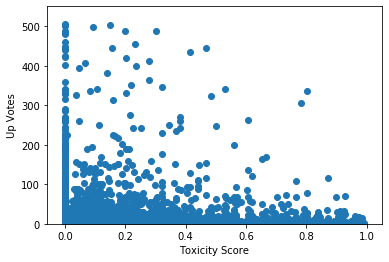

In [0]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


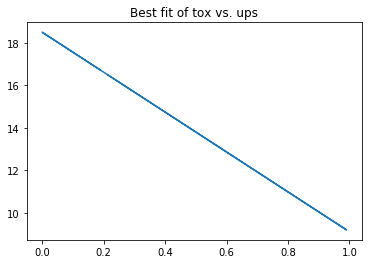

In [0]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [0]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686597


In [0]:
upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, utts[x].meta['toxicity']]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(utts[x].meta['toxicity'])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

('starcraft', -0.27384032357600807)
('atheism', -0.22348513909807635)
('explainlikeimfive', -0.13939416840791383)
('askscience', -0.10956977150863109)
('trees', -0.09727628835606086)
('hearthstone', -0.0970309933426117)
('tipofmytongue', -0.09066037183271945)
('buildapc', -0.07521749787184404)
('leagueoflegends', -0.06775391921410352)
('jailbreak', -0.06285257687786554)
('gaming', -0.041727481525480344)
('askreddit', -0.02767994907134295)
('electronic_cigarette', -0.02331297129980621)
('whowouldwin', 0.00402234714291879)
('pcmasterrace', 0.00446416832200411)
('personalfinance', 0.007126925299185703)
('malefashionadvice', 0.04441819503811307)
('loseit', 0.06596538002773104)
('summonerschool', 0.10341093480314038)
('pokemon', 0.11008570857269556)
('relationships', 0.1204720997965011)
('destinythegame', 0.12438564649784901)
('reddit.com', 0.13082806745092074)
('movies', 0.13592512094621084)
('techsupport', 0.14165529303857546)
